In [77]:
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
!pip install chardet
import chardet
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
 with open("spam.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
 data_f= pd.read_csv("spam.csv",encoding=encoding)
 data_f.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
data_f.head().isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True


In [80]:
data_f.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [81]:
data_f=data_f.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data_f.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
data_f['v1']=label.fit_transform(data_f['v1'])
data_f.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
data_f['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [85]:
data_f=data_f.rename(columns={'v1': 'Catagory','v2':'message'})
data_f.head()

,Catagory,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('stopwords')

In [87]:
data_f.columns

Index(['Catagory', 'message'], dtype='object')

Checking number of words, characters & sentence

In [88]:
data_f['word']=data_f['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data_f['character']=data_f['message'].apply(len)
data_f['sentence']=data_f['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data_f.head()

,Catagory,message,word,character,sentence
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [89]:
data_f.columns

Index(['Catagory', 'message', 'word', 'character', 'sentence'], dtype='object')

In [90]:
data_f[data_f['Catagory'] == 1][['word', 'character', 'sentence']].describe()

,word,character,sentence
count,747.000000,747.000000,747.000000
mean,27.891566,138.866131,3.021419
std,6.867007,29.183082,1.537580
min,2.000000,13.000000,1.000000
25%,25.000000,132.500000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [91]:
data_f[data_f['Catagory'] == 0][['word', 'character', 'sentence']].describe()

,word,character,sentence
count,4825.000000,4825.000000,4825.000000
mean,17.276269,71.023627,1.837720
std,13.988585,58.016023,1.454388
min,1.000000,2.000000,1.000000
25%,8.000000,33.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,92.000000,2.000000
max,220.000000,910.000000,38.000000


In [92]:
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

2. DATA VISUALIZATION

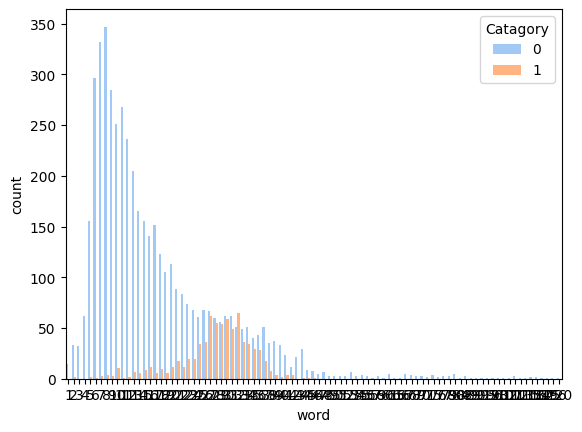

In [93]:
sns.countplot(x='word',data=data_f,hue='Catagory',palette="pastel",saturation=10)
plt.show()

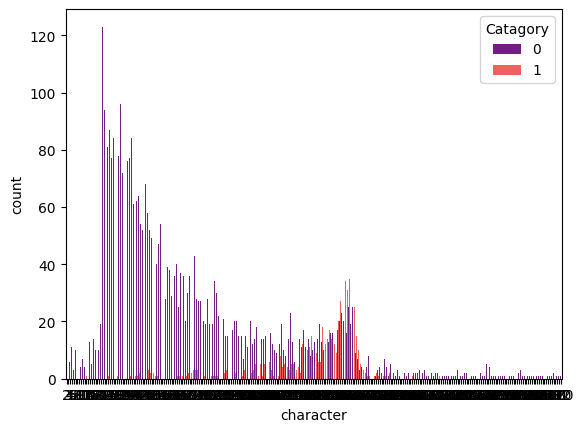

In [94]:
sns.countplot(x='character',data=data_f,hue='Catagory',palette="magma",saturation=1)
plt.show()

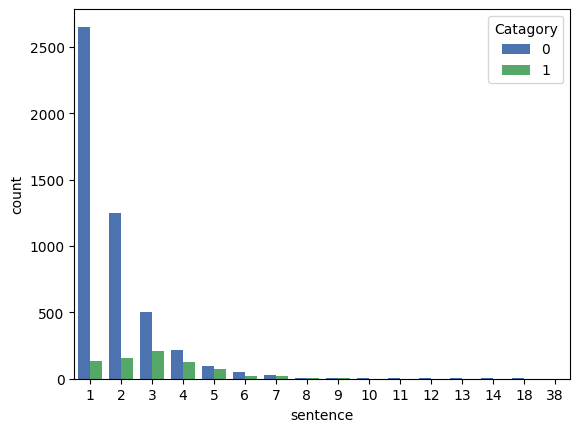

In [95]:
sns.countplot(x='sentence',data=data_f,hue='Catagory',palette='deep6',saturation=1)
plt.show()

3. CLEANING THE  MESSAGES

In [96]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
stop = set(stopwords.words("english"))

In [97]:
def clean_message(message):
  message= message.lower()
  message= nltk.word_tokenize(message)
  message=[i for i in message if i.isalpha()]
  message=[i for i in message if i not in string.punctuation]
  message=[i for i in message if i not in stop]
  message=[stemmer.stem(i) for i in message]
  message=" ".join(message)
  return message

data_f['clean_message']=data_f['message'].apply(clean_message)
data_f.head()

,Catagory,message,word,character,sentence,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


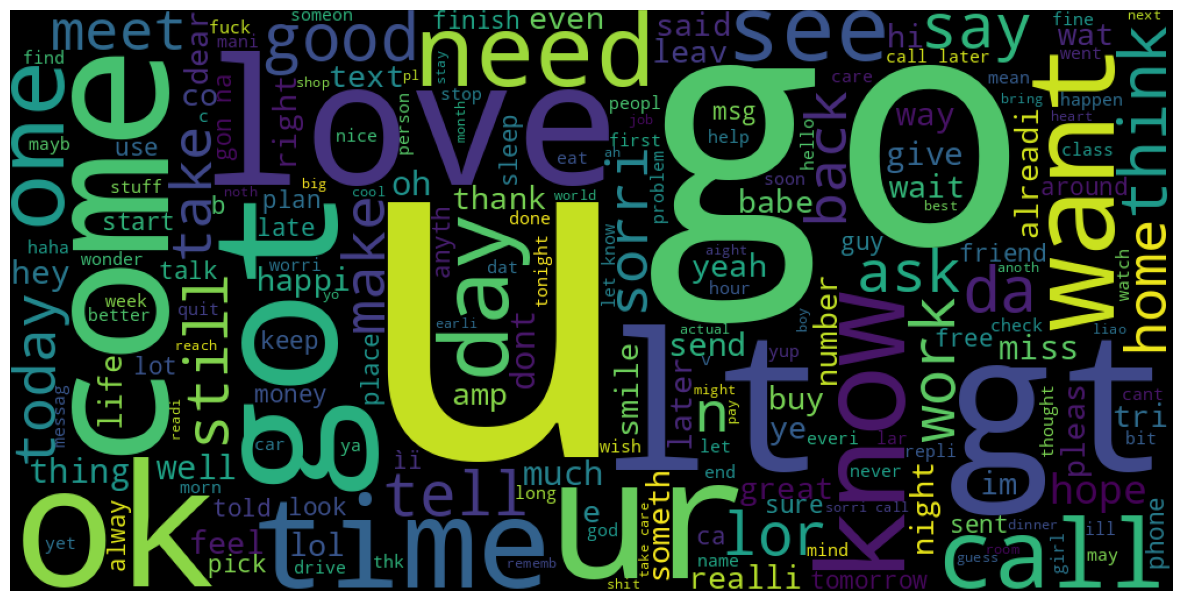

In [98]:
from wordcloud import WordCloud
ham = ' '.join(list(data_f[data_f['Catagory'] == 0]['clean_message']))
cloud = WordCloud(width=1000,height=500).generate(ham)
plt.figure(figsize=(15,12))
plt.imshow(cloud)
plt.axis('off')
plt.show()

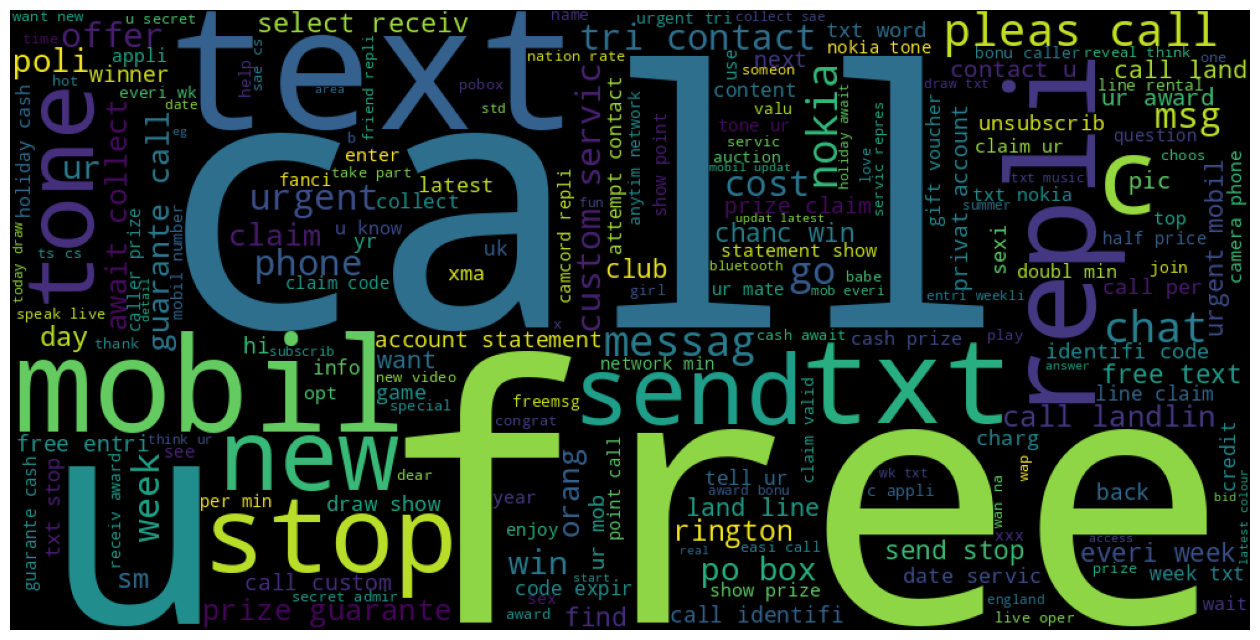

In [99]:
from wordcloud import WordCloud
spam = ' '.join(list(data_f[data_f['Catagory'] == 1]['clean_message']))
cloud = WordCloud(width=1000,height=500).generate(spam)
plt.figure(figsize=(16,19))
plt.imshow(cloud)
plt.axis('off')
plt.show()

4. MODEL BUILDING USING NAIVE BAYES


*   Fitting data using countvectorizer



In [100]:
vec=TfidfVectorizer(max_features=3000)
count_vec=CountVectorizer(max_features=3000)
x1=count_vec.fit_transform(data_f['clean_message']).toarray()
x=vec.fit_transform(data_f['clean_message']).toarray()
print(x1.shape)
print(x.shape)

(5572, 3000)
(5572, 3000)


In [101]:
y=data_f['Catagory'].values
print(y)

[0 0 1 ... 0 0 0]




*   Splitting the data



In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,test_size=0.2,random_state=0)



*   Predicting accuracy score,presicion score & confusion matrix

In [103]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
m=MultinomialNB()
g=GaussianNB()
b=BernoulliNB()

m.fit(x_train,y_train)
multi_nb_pred=m.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(multi_nb_pred,y_test))
print('precision SCORE : ',precision_score(multi_nb_pred,y_test))
print('recall score :',recall_score(multi_nb_pred,y_test))
print('f1 score :',round((f1_score(multi_nb_pred,y_test)),2))
print('confusion metrics : ',confusion_matrix(multi_nb_pred,y_test))
print(classification_report(y_test,multi_nb_pred))
print("countvectorizer")
m.fit(x_train1,y_train1)
multi_nb_pred1=m.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(multi_nb_pred1,y_test1))
print('precision SCORE : ',precision_score(multi_nb_pred1,y_test1))
print('recall score :',recall_score(multi_nb_pred1,y_test1))
print('f1 score :',round((f1_score(multi_nb_pred1,y_test1)),2))
print('confusion metrics : ',confusion_matrix(multi_nb_pred1,y_test1))
print(classification_report(y_test1,multi_nb_pred1))

ACCURACY SCORE :  0.968609865470852
precision SCORE :  0.7951807228915663
recall score : 0.9924812030075187
f1 score : 0.88
confusion metrics :  [[948  34]
 [  1 132]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.99      0.80      0.88       166

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

countvectorizer
ACCURACY SCORE :  0.9739910313901345
precision SCORE :  0.9156626506024096
recall score : 0.9101796407185628
f1 score : 0.91
confusion metrics :  [[934  14]
 [ 15 152]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       949
           1       0.91      0.92      0.91       166

    accuracy                           0.97      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.97      0.97      0.97     

In [104]:
b.fit(x_train,y_train)
bernoulli_nb_pred=b.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(bernoulli_nb_pred,y_test))
print('precision SCORE : ',precision_score(bernoulli_nb_pred,y_test))
print('recall score :',recall_score(bernoulli_nb_pred,y_test))
print('f1 score :',round((f1_score(bernoulli_nb_pred,y_test)),2))
print('confusion metrics : ',confusion_matrix(bernoulli_nb_pred,y_test))

ACCURACY SCORE :  0.9730941704035875
precision SCORE :  0.8554216867469879
recall score : 0.9594594594594594
f1 score : 0.9
confusion metrics :  [[943  24]
 [  6 142]]


In [105]:
b.fit(x_train1,y_train1)
bernoulli_nb_pred1=b.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(bernoulli_nb_pred1,y_test1))
print('precision SCORE : ',precision_score(bernoulli_nb_pred1,y_test1))
print('recall score :',recall_score(bernoulli_nb_pred1,y_test1))
print('f1 score :',round((f1_score(bernoulli_nb_pred1,y_test1)),2))
print('confusion metrics : ',confusion_matrix(bernoulli_nb_pred1,y_test1))

ACCURACY SCORE :  0.9730941704035875
precision SCORE :  0.8554216867469879
recall score : 0.9594594594594594
f1 score : 0.9
confusion metrics :  [[943  24]
 [  6 142]]


In [106]:
#best model
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
ex_pred=ex.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(ex_pred,y_test))
print('precision SCORE : ',precision_score(ex_pred,y_test))
print('recall score :',recall_score(ex_pred,y_test))
print('f1 score :',round((f1_score(ex_pred,y_test)),2))
print('classification report \n',classification_report(ex_pred,y_test))

ACCURACY SCORE :  0.97847533632287
precision SCORE :  0.8614457831325302
recall score : 0.9930555555555556
f1 score : 0.92
classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       971
           1       0.86      0.99      0.92       144

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [107]:
ex.fit(x_train1,y_train1)
ex_pred1=ex.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(ex_pred1,y_test1))
print('precision SCORE : ',precision_score(ex_pred1,y_test1))
print('recall score :',recall_score(ex_pred1,y_test1))
print('f1 score :',round((f1_score(ex_pred1,y_test1)),2))
print('classification report \n',classification_report(ex_pred1,y_test1))

ACCURACY SCORE :  0.97847533632287
precision SCORE :  0.8674698795180723
recall score : 0.9863013698630136
f1 score : 0.92
classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       969
           1       0.87      0.99      0.92       146

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [108]:
g.fit(x_train,y_train)
gaussian_nb_pred=g.predict(x_test)
print("Tfidfvectorizer")
print('ACCURACY SCORE : ',accuracy_score(gaussian_nb_pred,y_test))
print('precision SCORE : ',precision_score(gaussian_nb_pred,y_test))
print('recall score :',recall_score(gaussian_nb_pred,y_test))
print('f1 score :',round((f1_score(gaussian_nb_pred,y_test)),2))
print(classification_report(y_test,gaussian_nb_pred))

print("Countvectorizer")
g.fit(x_train1,y_train1)
gaussian_nb_pred1=g.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(gaussian_nb_pred1,y_test1))
print('precision SCORE : ',precision_score(gaussian_nb_pred1,y_test1))
print('recall score :',recall_score(gaussian_nb_pred1,y_test1))
print('f1 score :',round(f1_score(gaussian_nb_pred1,y_test1)),2)
print(classification_report(y_test1,gaussian_nb_pred1))

Tfidfvectorizer
ACCURACY SCORE :  0.852914798206278
precision SCORE :  0.7951807228915663
recall score : 0.5038167938931297
f1 score : 0.62
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       949
           1       0.50      0.80      0.62       166

    accuracy                           0.85      1115
   macro avg       0.73      0.83      0.76      1115
weighted avg       0.89      0.85      0.87      1115

Countvectorizer
ACCURACY SCORE :  0.8618834080717489
precision SCORE :  0.8554216867469879
recall score : 0.5220588235294118
f1 score : 1 2
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       949
           1       0.52      0.86      0.65       166

    accuracy                           0.86      1115
   macro avg       0.75      0.86      0.78      1115
weighted avg       0.90      0.86      0.87      1115



In [109]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(rf_pred,y_test))
print('precision SCORE : ',precision_score(rf_pred,y_test))
print('recall score :',recall_score(rf_pred,y_test))
print('f1 score :',round(f1_score(rf_pred,y_test)),3)
print(classification_report(y_test,rf_pred))

rf.fit(x_train1, y_train1)
rf_pred1 = rf.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(rf_pred1,y_test1))
print('precision SCORE : ',precision_score(rf_pred1,y_test1))
print('recall score :',recall_score(rf_pred1,y_test1))
print('f1 score :',round((f1_score(rf_pred1,y_test1)),3))
print(classification_report(y_test1,rf_pred1))

ACCURACY SCORE :  0.9766816143497757
precision SCORE :  0.8493975903614458
recall score : 0.9929577464788732
f1 score : 1 3
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       0.99      0.85      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

ACCURACY SCORE :  0.9766816143497757
precision SCORE :  0.8554216867469879
recall score : 0.9861111111111112
f1 score : 0.916
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [110]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(dtc_pred,y_test))
print('precision SCORE : ',precision_score(dtc_pred,y_test))
print('recall score :',recall_score(dtc_pred,y_test))
print('f1 score :',round(f1_score(dtc_pred,y_test)),3)
print(classification_report(y_test,dtc_pred))

dtc.fit(x_train1, y_train1)
dtc_pred1 = dtc.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(dtc_pred1,y_test1))
print('precision SCORE : ',precision_score(dtc_pred1,y_test1))
print('recall score :',recall_score(dtc_pred1,y_test1))
print('f1 score :',round((f1_score(dtc_pred1,y_test1)),3))
print(classification_report(y_test1,dtc_pred1))

ACCURACY SCORE :  0.9623318385650225
precision SCORE :  0.8674698795180723
recall score : 0.8780487804878049
f1 score : 1 3
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       949
           1       0.88      0.87      0.87       166

    accuracy                           0.96      1115
   macro avg       0.93      0.92      0.93      1115
weighted avg       0.96      0.96      0.96      1115

ACCURACY SCORE :  0.95695067264574
precision SCORE :  0.8192771084337349
recall score : 0.8831168831168831
f1 score : 0.85
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       949
           1       0.88      0.82      0.85       166

    accuracy                           0.96      1115
   macro avg       0.93      0.90      0.91      1115
weighted avg       0.96      0.96      0.96      1115



5. Creating a pandas dataframe to compare performance of different models




In [111]:
svm=SVC()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(svm_pred,y_test))
print('precision SCORE : ',precision_score(svm_pred,y_test))
print('recall score :',recall_score(svm_pred,y_test))
print('f1 score :',round((f1_score(svm_pred,y_test)),3))
print(classification_report(y_test,svm_pred))

ACCURACY SCORE :  0.9713004484304932
precision SCORE :  0.8192771084337349
recall score : 0.9855072463768116
f1 score : 0.895
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       0.99      0.82      0.89       166

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [112]:
svm.fit(x_train1,y_train1)
svm_pred1=svm.predict(x_test1)
print('ACCURACY SCORE : ',accuracy_score(svm_pred1,y_test1))
print('precision SCORE : ',precision_score(svm_pred1,y_test1))
print('recall score :',recall_score(svm_pred1,y_test1))
print('f1 score :',round((f1_score(svm_pred1,y_test1)),3))
print(classification_report(y_test1,svm_pred1))

ACCURACY SCORE :  0.9739910313901345
precision SCORE :  0.8253012048192772
recall score : 1.0
f1 score : 0.904
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       1.00      0.83      0.90       166

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



* Extra Tree classifier and Multinomial naive bayes model are the best performing model. Therefore visualizing the result of both   

In [121]:
model = [multi_nb_pred1,ex_pred,svm_pred1,rf_pred1]
model_name = ['Multinomial Naive Bayes','Extra Tree Classifier','SVM Classifier','Random forest classifier']
new = pd.DataFrame()
k=0
for i in model:
  data = pd.DataFrame({
      'Accuracy_score': [round((accuracy_score(i,y_test1)),2)],
      'Precision_score': [round((precision_score(i,y_test1)),2)],
      'Recall_score': [round((recall_score(i,y_test1)),2)],
      'F1_score': [round((f1_score(i,y_test1)),2)]
  },index=[k])
  new = pd.concat([new,data],axis=0)
  k=k+1
new['Model_name'] = model_name
nm = new.copy()
def highlight(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
new_df = new.style.apply(highlight,subset =['Accuracy_score','F1_score'])
new_df


,Accuracy_score,Precision_score,Recall_score,F1_score,Model_name
0,0.970000,0.920000,0.910000,0.910000,Multinomial Naive Bayes
1,0.980000,0.860000,0.990000,0.920000,Extra Tree Classifier
2,0.970000,0.830000,1.000000,0.900000,SVM Classifier
3,0.980000,0.860000,0.990000,0.920000,Random forest classifier


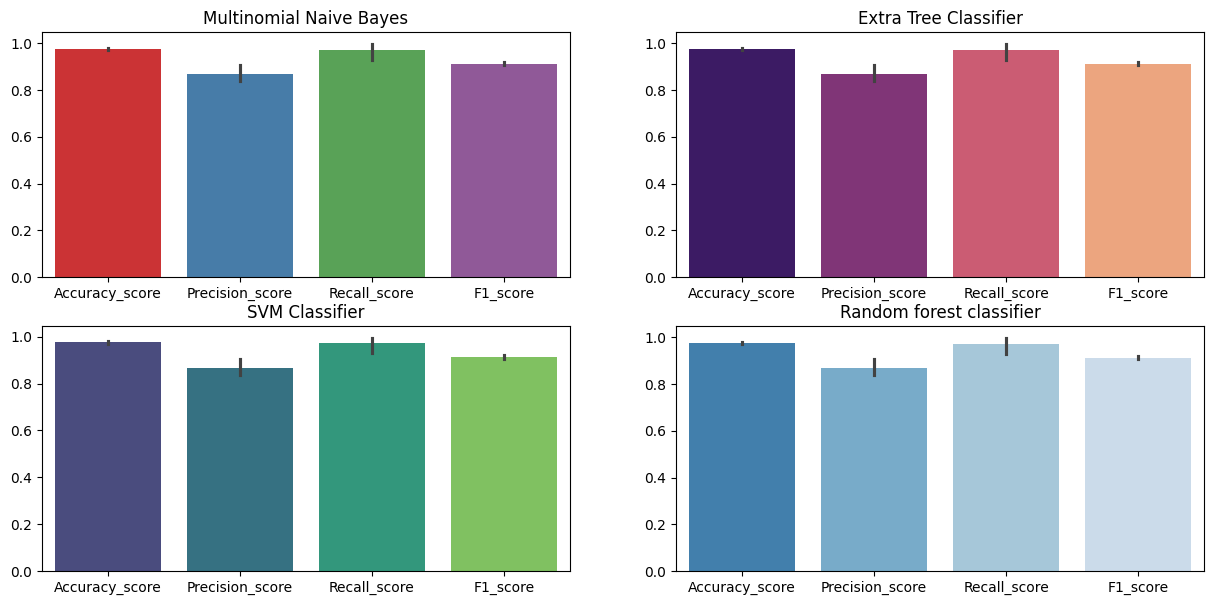

In [123]:
plt.figure(figsize=(15,7))
for i in range(len(model_name)):
  plt.subplot(2,2,i+1)
  plt.title(model_name[i])
  sns.barplot(data=nm.drop(columns=['Model_name']),palette=pal[i])
plt.show()

In [124]:
import pickle
pickle.dump(m,open('./spam_webapp.sav','wb'))
pickle.dump(vec,open('./vectorizer.sav','wb'))